## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [3]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [5]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum())
#df['Sales'].fillna(df['Sales'].mean(), inplace=True)  # Replace missing values with mean

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns='price',axis=1)
y=df['price']

In [8]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


NameError: name 'pplt' is not defined

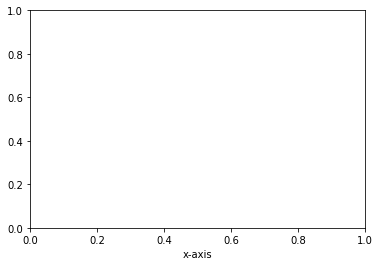

In [9]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
plt.xlabel('x-axis')
pplt.scatter(df['area'],df['price'])
lt.ylabel('y-axis')
plt.show()

plt.scatter(df['parking'],df['price'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [10]:
#7 Encoding categorical data in X
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler
label_encoder=LabelEncoder()
x['mainroad']=label_encoder.fit_transform(x['mainroad'])
print(x)

     area  bedrooms  bathrooms  stories  mainroad guestroom basement  \
0    7420         4          2        3         1        no       no   
1    8960         4          4        4         1        no       no   
2    9960         3          2        2         1        no      yes   
3    7500         4          2        2         1        no      yes   
4    7420         4          1        2         1       yes      yes   
..    ...       ...        ...      ...       ...       ...      ...   
540  3000         2          1        1         1        no      yes   
541  2400         3          1        1         0        no       no   
542  3620         2          1        1         1        no       no   
543  2910         3          1        1         0        no       no   
544  3850         3          1        2         1        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        f

In [11]:
columns=['guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for column in columns:
    x[column]=label_encoder.fit_transform(x[column])
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [12]:
#8  Avoiding the Dummy Variable Trap


In [13]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [14]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler
Scaler=MaxAbsScaler()
Scaler.fit_transform(x)
# scaled_data=scaler.fit_transform(df)
# print(df)
# print(scaled_data)

array([[0.45802469, 0.66666667, 0.5       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.55308642, 0.66666667, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.61481481, 0.5       , 0.5       , ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.22345679, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.17962963, 0.5       , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.23765432, 0.5       , 0.25      , ..., 0.        , 0.        ,
        1.        ]])

In [15]:
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler
Scaler=MaxAbsScaler()
Scaled_data=Scaler.fit_transform(x)
print(df)
print(Scaled_data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [16]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train,x_test,y_train,y_test)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
126  7160         3          1        1         1          0         1   
363  3584         2          1        1         1          0         0   
370  4280         2          1        1         1          0         0   
31   7000         3          1        4         1          0         0   
113  9620         3          1        1         1          0         1   
..    ...       ...        ...      ...       ...        ...       ...   
71   6000         4          2        4         1          0         0   
106  5450         4          2        1         1          0         1   
270  4500         3          2        3         1          0         0   
435  4040         2          1        1         1          0         0   
102  5500         3          2        4         1          1         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
126                0              

In [17]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred=model.predict(x_train)

In [20]:
#12 Predict on the train set and calculate the error = y_pred - y_train
err=y_pred-y_train
err


126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
           ...     
71    -1.913138e+05
106    2.095515e+05
270    1.985625e+06
435   -4.325689e+05
102    9.410638e+05
Name: price, Length: 381, dtype: float64

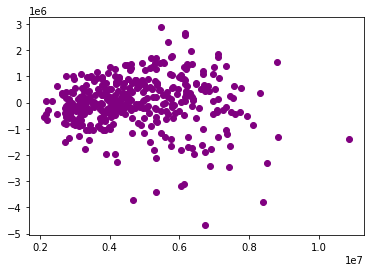

In [21]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.scatter(y_pred,err,color="purple")
plt.show()

In [22]:
#14  Predic on the test set
y_pred1=model.predict(x_test)

In [23]:
err = y_test[:len(y_pred1)] - y_pred1


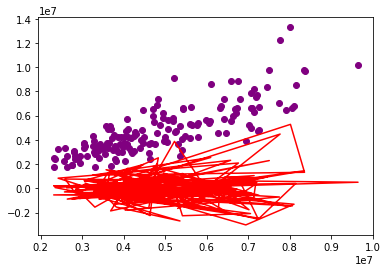

In [24]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

plt.scatter(y_pred1,y_test,color="purple")
plt.plot(y_pred1,err,color="red")
plt.show()

In [31]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Now shapes should match
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

# Calculate Mean Squared Error (MSE) and R-Squared value
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


y_test shape: (109,)
y_pred shape: (109,)
MSE: 1771751116594.0342
R2: 0.6494754192267805
Mean Squared Error: 1771751116594.0342
R-squared: 0.6494754192267805


In [34]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
# R Squared manually
import numpy as np
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2_manual = 1 - (ss_residual / ss_total)
print("R Squared (Manual):", r2_manual)

# Adjusted R Squared
n = len(x_test)  # Number of test samples
p = x_test.shape[1]  # Number of features (1 in this case)
adj_r2 = 1 - (1 - r2_manual) * (n - 1) / (n - p - 1)
print("Adjusted R Squared (Manual):", adj_r2)

R Squared (Manual): 0.6494754192267805
Adjusted R Squared (Manual): 0.6056598466301282
